### 1. 결정트리 개요

>__정보의 균일도__ 에 따라 계속해서 가지를 쳐 나가며 데이터를 split하는 방식<br><br> 
정보의 균일도를 판단하기 위해<br>
&nbsp;&nbsp;&nbsp;&nbsp;1) __정보이득지수__ : (1 - 엔트로피 지수) 로 판단. 엔트로피지수는 서로 다른 값이 섞여 있을수록 높음<br>
&nbsp;&nbsp;&nbsp;&nbsp;2) __지니계수__ : 경제학에서 불평등 지수를 나타낼 때 사용하는 지니계수를 계승. 0~1사이의 값을 가지며 1에 가까울수록 불평등<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-> DecisionTreeClassifier가 사용하는 방식<br>

### 2. 결정트리 모델의 특징

>__장점__ : 룰이 명확하기 때문에 직관적이고 시각화 가능. 정규화나 스케일링등의 전처리 작업 불필요  
>__단점__ : 과적합으로 인해 정확도가 떨어짐

### 3. 결정트리 파라미터


> 사이킷런의 결정 트리 구현은 __CART__ 알고리즘 기반  
>  &nbsp;&nbsp;&nbsp;&nbsp;_결정트리의 알고리즘은 CART 이외에도 ID3, C5.0, CHAID등이 있음_

|파라미터명|설명|
|:------|:---|
|min_samples_split|노드를 분할하기 위한 최소 샘플 데이터수. 과적합 제어용이며 디폴트는 2|
|min_samples_leaf|말단 노드가 되기 위한 최소한의 샘플 데이터 수. 과적합 제어용|
|max_features|최적 분할을 위해 고려할 피처 갯수. 디폴트는 None으로 모든 피처를 사용한다는 의미|
|max_depth|트리의 최대 깊이 규정. 디폴트는 None으로 완벽한 클래스 결정이 될 때 까지 트리를 성장시킴 <br>단 깊이가 깊어지면 과적합 발생 가능|
|max_leaf_nodes|말단 노드의 최대 갯수 규정|

### 4. 결정트리 모델 시각화

#### 4.1 결정 트리 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

## 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state = 11)

## 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [2]:
from sklearn.tree import export_graphviz

## export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot파일을 생성
export_graphviz(dt_clf, out_file = 'tree.dot', class_names=iris_data.target_names,\
                feature_names = iris_data.feature_names, impurity=True, filled=True)

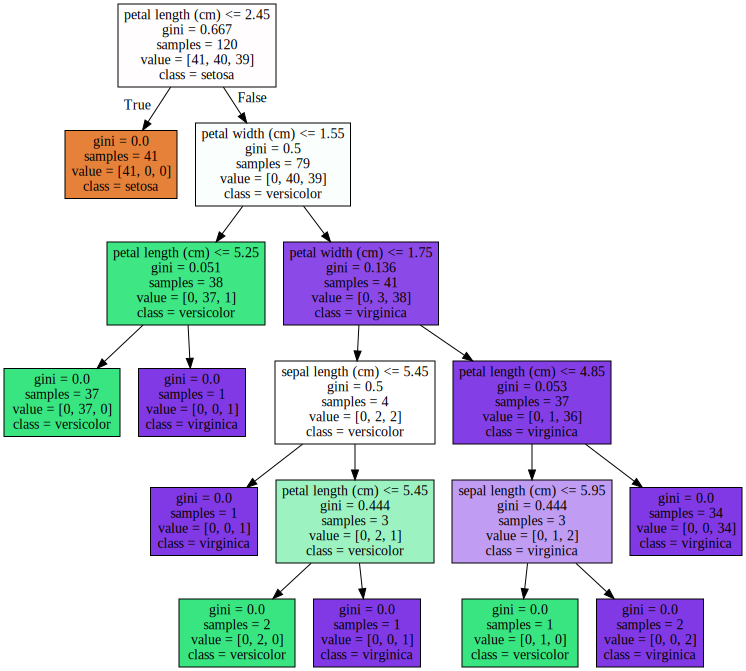

In [3]:
import graphviz
## 위에서 생성된 tree.dot파일을 graphviz가 읽어서 주피터 노트북상에서 시각화

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### 4.2 피처 중요도 시각화

Feature importances :
[0.025 0.    0.555 0.42 ]
sepal length (cm) :  0.025
sepal width (cm) :  0.000
petal length (cm) :  0.555
petal width (cm) :  0.420


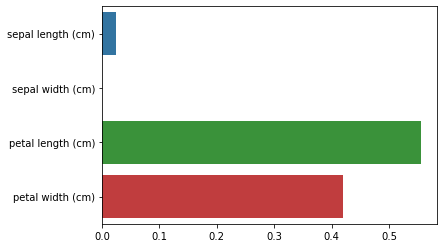

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

## feature importance 추출
print(f'Feature importances :\n{np.round(dt_clf.feature_importances_,3)}')

## feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name} : {value : .3f}')
    
## feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### 5. 결정트리 과적합

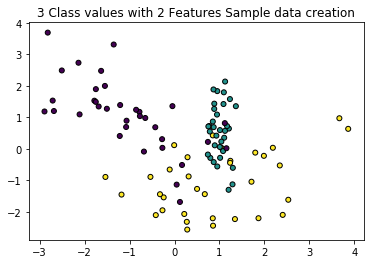

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

## 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features =2, n_redundant=0, n_informative=2,\
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

## 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [6]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

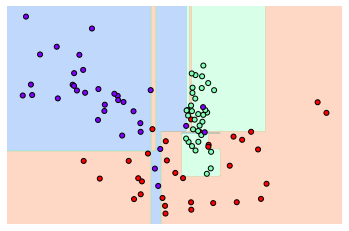

In [7]:
from sklearn.tree import DecisionTreeClassifier

## 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치 데이터를 분류하다보니 결정 경계 기준이 지나치게 많이 생김 -> __과적합 발생__

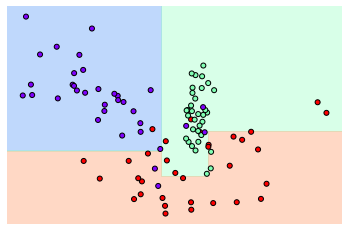

In [8]:
# 하이퍼 파라미터 추가

## min_samples_leaf = 6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

완화된 조건으로 좀 더 일반화된 분류규칙에 따라 분류  
이 경우 __과적합 발생확률 감소__ 하여 __테스트 데이터 세트의 정확도는 상승__ 할 확률 증가

### 6. 결정트리 실습 - 사용자 행동 인식 데이터 세트

In [9]:
# 피처 인덱스와 피처명 확인

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 dfm으로 로드
features_name_df = pd.read_csv('data/human_activity/features.txt', sep = '\s+',\
                               header=None, names=['column_index', 'column_name'])

## 피처명 인덱스를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = features_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [10]:
# 중복 피처명 확인

feature_dup_df = features_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())

feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [18]:
# 중복된 피처명에 _1, _2, _3을 붙여주는 함수
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [31]:
# 데이터셋을 데이터프레임으로 만들어주는 함수

import pandas as pd

def get_human_dataset():
    
    ## 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('data/human_activity/features.txt', sep = '\s+', header = None, names = ['column_index', 'column_name'])
    
    ## 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 dfm 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    ## dfm에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    ## 학습 피처 데이터세트와 테스트 피처 데이터를 dfm으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('data/human_activity/train/X_train.txt', sep='\s+', names = feature_name)
    X_test = pd.read_csv('data/human_activity/test/X_test.txt', sep='\s+', names = feature_name)
    
    ## 학습 레이블과 테스트 레이블 데이터를 dfm으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('data/human_activity/train/y_train.txt', sep='\s+', names = ['action'])
    y_test = pd.read_csv('data/human_activity/test/y_test.txt', sep='\s+', names = ['action'])

    ## 로드된 학습/테스트용 dfm을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [32]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [33]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [34]:
# DecitionTreeClassifier를 통해 동작 예측 분류 수행
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f'결정 트리 예측 정확도 : {accuracy:.4f}')

## DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier의 기본 하이퍼 파라미터 :\n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier의 기본 하이퍼 파라미터 :
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [36]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16 ,20 ,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring = 'accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f'GridSearchCV 최고 평균 정확도 수치: {grid_cv.best_score_:.4f}')
print('GridSearchCV 최적 하이퍼 파라미터: ',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.8min finished


GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 16}


In [39]:
## GridSearchCV 객체의 cv_results_ 속성을 dfm으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

## max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [40]:
# 별도의 데이터 세트에서 하이퍼 파라미터 변화에 따른 값 측정

max_depths = [6, 8, 10, 12, 16, 20 ,24]
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f'max_depth = {depth} 정확도 : {accuracy:.4f}')

max_depth = 6 정확도 : 0.8558
max_depth = 8 정확도 : 0.8707
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8646
max_depth = 16 정확도 : 0.8575
max_depth = 20 정확도 : 0.8548
max_depth = 24 정확도 : 0.8548


In [43]:
# 두가지 하이퍼 파라미터를 튜닝
params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f'GridSearchCV 최고 평균 정확도 수치: {grid_cv.best_score_:.4f}')
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.1min finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [46]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print(f'결정트리 예측 정확도: {accuracy:.4f}')

결정트리 예측 정확도: 0.8717


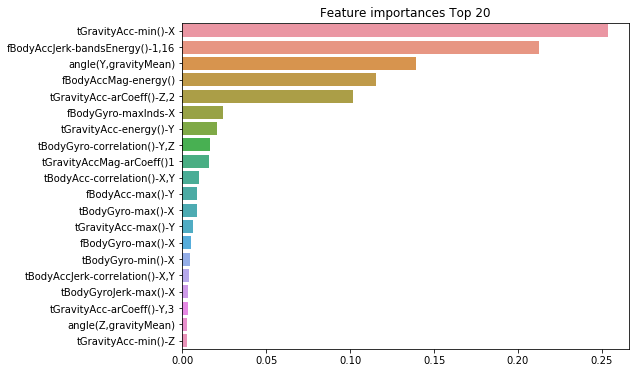

In [48]:
# 피처 중요도 시각화

import seaborn as sns
ftr_importances_values = best_df_clf.feature_importances_

## Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Serise로 변환
ftr_importances_values = pd.Series(ftr_importances_values, index=X_train.columns)

## 중요도 순으로 Series를 정렬
ftr_top20 = ftr_importances_values.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

__feature_importance_ 의 동작원리__  
> 불순도 기반. 즉 어떤 피처가 __불순도를 가장 많이 감소__시키느냐에 따라 피처의 중요도를 결정  
랜덤 포레스트의 경우는 모든 트리들의 불순도 감소값을 평균 낸 것

__feature_importance_ 의 한계__  
> 1) 연속형 변수 혹은 카테고리 개수가 매우 많은(high cardinality) 변수들의 중요도를 부풀릴 가능성이 높음.  
&nbsp;&nbsp;&nbsp;&nbsp;-> 기본적으로 신뢰할 만 하지만 __Permutation Feature Importance__와 같은 다른 방법을 혼합해서 사용하는 것을 추천__  
2) train 데이터셋으로부터 얻은 통계량을 기반으로 하기 때문에 __과적합__ 으로부터 자유롭지 못함